In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import nbodykit.lab as nlab

In [3]:
# Use path to any nbodykit 0.1.x FOF catalogue file
cat = nlab.HDFCatalog('./output/fof_ll0.200_1.0000.hdf5', 'FOFGroups')

In [4]:
cat.columns

['InitialPosition', 'Length', 'Position', 'Selection', 'Velocity', 'Weight']

In [5]:
cat['Position'][:10].compute()

array([[ 0.99749643,  0.00169637,  0.00772012],
       [ 0.10318882,  0.45619035,  0.13430744],
       [ 0.59076834,  0.4335967 ,  0.97040516],
       [ 0.15837042,  0.07852833,  0.48281893],
       [ 0.57589543,  0.89760643,  0.33320153],
       [ 0.97962379,  0.9485063 ,  0.73405337],
       [ 0.39012414,  0.33662853,  0.68443793],
       [ 0.32708982,  0.23739287,  0.32986504],
       [ 0.2193608 ,  0.36659649,  0.97176474],
       [ 0.90227377,  0.21752802,  0.31822142]], dtype=float32)

In [6]:
cat['Position'] = cat['Position'] * cat.attrs['BoxSize']
cat['VelocityOffset'] = cat['Velocity'] * cat.attrs['BoxSize']
# add RSD
cat['Position'] = cat['Position'] + cat['VelocityOffset'] * [0, 0, 1]
cat['Selection'] = cat['Length'] * 1e12 > 1e13

In [7]:
cat['Position'][:10].compute()
cat['VelocityOffset'][:10].compute()

array([[ -1.22528084e-03,  -4.68146536e-04,  -4.95916069e-03],
       [  2.20598781e+00,  -1.04948062e+00,   3.61116207e+00],
       [  1.05990949e+00,  -3.36050498e+00,   1.57266390e+00],
       [  1.64616072e+00,   5.31914735e+00,   2.70750958e+00],
       [ -3.36869931e+00,  -1.13192341e+00,   1.49011472e+00],
       [  1.25694439e+00,   1.83436078e+00,  -2.90486151e+00],
       [ -1.04875231e+00,  -5.24975610e+00,  -1.04227227e+00],
       [  1.14127882e-01,   2.03242457e+00,  -4.49990764e-01],
       [  1.79616250e-01,  -5.68012387e-01,   3.73590374e+00],
       [ -1.96571159e+00,  -2.96716762e+00,   1.24750871e-01]])

In [8]:
r = nlab.FFTPower(cat, mode='2d', Nmesh=128)

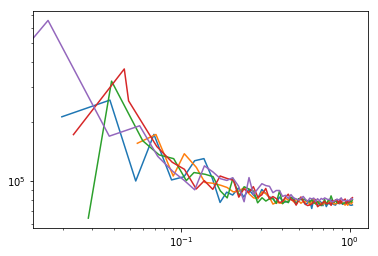

In [9]:
plot(r.power['k'], abs(r.power['power']))
xscale('log')
yscale('log')